In [1]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils
import matplotlib.pyplot as plt
import statistics 
from statistics import mode
from torch.optim.lr_scheduler import StepLR
%matplotlib inline

In [2]:
def train_epoch(model, opt, criterion, batch_size=100):
    model.train()
    losses = []
    for index in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[index:index + batch_size, :]
        label_batch = labels[index:index + batch_size, :]
        opt.zero_grad()
        prediction = model(x_batch)
        loss = criterion(prediction,label_batch)
        loss.backward()
        opt.step()
        losses.append(loss.item())
    losses = sum(losses)/len(losses)
    return losses

In [3]:
def testingAccuracy(model,x_test,output1):
    predictions_array=[]
    model = model.eval()
    for i in range(5):
        with torch.no_grad():
            predictions = model(x_test)
        test = np.asarray(predictions)
        test[test>0.5]=1
        test[test<=0.5]=0
        predictions_array.append(test)
    predictions_array = np.array(predictions_array)
    predictions_array = np.squeeze(predictions_array,axis=2)
    final_prediction =np.zeros(predictions_array.shape[1])
    for i in range(predictions_array.shape[1]):
        temp_list=predictions_array[:,i].tolist()
        final_prediction[i]=mode(temp_list)
    count=0
    for i in range(test.shape[0]):
        if(output1[i]==final_prediction[i]):
            count = count+1
    print("Accuracy is ", (count/final_prediction.shape[0])*100)
    return (count/final_prediction.shape[0])*100

In [4]:
#change the dataframe to numpy array to tensor array
def changeToTensor(dataFrame):
    dataFrame= (dataFrame-dataFrame.min())/(dataFrame.max()-dataFrame.min())
    x = dataFrame.values
    x= x.astype('float64')
    x= torch.Tensor(x)
    return x

In [5]:
### create a model with pytorch#####
class Net_H(nn.Module):
    def __init__(self,size,H_size):
        super(Net_H, self).__init__()
        self.fc1 = nn.Linear(size,H_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H_size,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [6]:
### create a model with pytorch#####
class Net_5(nn.Module):
    def __init__(self,size):
        super(Net_5, self).__init__()
        self.fc1 = nn.Linear(size,5)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [7]:
train_data = pd.read_csv('train.txt',sep=',')
test_data = pd.read_csv('test.txt',sep=',')

In [8]:
train_data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [9]:
train_numpy = train_data.values
labels = train_numpy[:,-1]
labels= labels.astype('float64')
labels= torch.Tensor(labels)
train_sub = train_data.drop(['date','Occupancy'],axis=1)
x_train = changeToTensor(train_sub)

In [10]:
labels = labels.unsqueeze(1)

In [11]:
x_train.shape, labels.shape

(torch.Size([8143, 5]), torch.Size([8143, 1]))

In [12]:
model = Net_5(x_train.shape[1])

In [13]:
model

Net_5(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [14]:
criteria= nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [15]:
num_epochs = 100
loss_to_plot_batch=[]
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    loss_to_plot_batch.append(e_losses)
    print("For epoch ",e+1,"loss is ",e_losses)

For epoch  1 loss is  0.6872778534889221
For epoch  2 loss is  0.6867502331733704
For epoch  3 loss is  0.6862103939056396
For epoch  4 loss is  0.6856603622436523
For epoch  5 loss is  0.6851150393486023
For epoch  6 loss is  0.6845682263374329
For epoch  7 loss is  0.6840177178382874
For epoch  8 loss is  0.6834590435028076
For epoch  9 loss is  0.6829085946083069
For epoch  10 loss is  0.6823475956916809
For epoch  11 loss is  0.6817818880081177
For epoch  12 loss is  0.6812204122543335
For epoch  13 loss is  0.6806487441062927
For epoch  14 loss is  0.680074155330658
For epoch  15 loss is  0.6794996857643127
For epoch  16 loss is  0.6789191365242004
For epoch  17 loss is  0.6783385872840881
For epoch  18 loss is  0.6777529716491699
For epoch  19 loss is  0.6771594882011414
For epoch  20 loss is  0.6765717267990112
For epoch  21 loss is  0.6759764552116394
For epoch  22 loss is  0.6753779053688049
For epoch  23 loss is  0.6747746467590332
For epoch  24 loss is  0.6741613149642944
Fo

In [16]:
test_numpy = test_data.values
output1 = test_numpy[:,-1]
output1=output1.astype('float64')
test_sub = test_data.drop(['date','Occupancy'],axis=1)
x_test = changeToTensor(test_sub)

In [17]:
baseline_accuracy = testingAccuracy(model,x_test,output1)

Accuracy is  82.85479901558655


In [19]:
baseline_error= 1-(baseline_accuracy/100)

In [20]:
baseline_error_plot=[baseline_error]*100

In [21]:
model1 = Net_5(x_train.shape[1])

In [22]:
model1

Net_5(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Accuracy for the testing data with learning rate  0.01
Accuracy is  99.21041837571781
Accuracy for the training data
Accuracy is  98.90703671865407
Accuracy for the testing data with learning rate  0.02
Accuracy is  98.89253486464314
Accuracy for the training data
Accuracy is  98.83335380081051
Accuracy for the testing data with learning rate  0.001
Accuracy is  98.84126333059885
Accuracy for the training data
Accuracy is  98.30529288959843
Accuracy for the testing data with learning rate  0.002
Accuracy is  99.02584085315833
Accuracy for the training data
Accuracy is  98.83335380081051


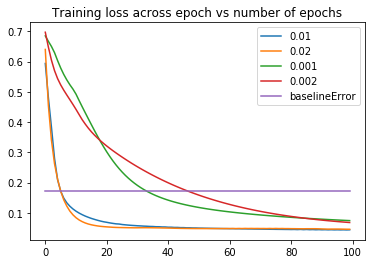

In [23]:
for learning_rate in [0.01,0.02,0.001,0.002]:
    num_epochs = 100
    e_losses=[]
    loss_across_epoch=[]
    model1 = Net_5(x_train.shape[1])
    optimizer = torch.optim.Adam(model1.parameters(),lr=learning_rate)
    for e in range(num_epochs):
        e_losses = train_epoch(model1,optimizer ,criteria,100)
        #loss_to_plot = sum(e_losses)/len(e_losses)
        loss_across_epoch.append(e_losses)
    
    print("Accuracy for the testing data with learning rate ",learning_rate)
    dummy=testingAccuracy(model1,x_test,output1)
    print("Accuracy for the training data")
    dummy=testingAccuracy(model1,x_train,train_numpy[:,-1].astype('float64'))
    plt.title('Training loss across epoch vs number of epochs')
    plt.plot(loss_across_epoch)
    #plt.axhline(y=baseline_error)
    
plt.plot(baseline_error_plot)
plt.legend(['0.01','0.02','0.001','0.002','baselineError'], loc='upper right')
plt.show()

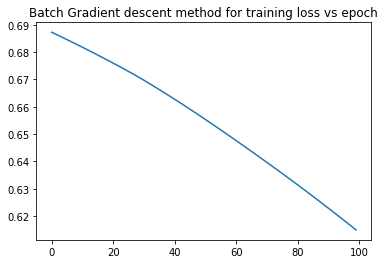

In [24]:
plt.title('Batch Gradient descent method for training loss vs epoch')
plt.plot(loss_to_plot_batch)

/work/test/venv/lib/python3.5/site-packages/torch/optim/lr_scheduler.py:82: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Accuracy is  78.76703917475132
Accuracy is  78.98892534864643
Accuracy is  96.045683409063
Accuracy is  91.52994257588188
Accuracy is  95.1123664497114
Accuracy is  90.09433962264151
Accuracy is  97.00356134102911
Accuracy is  88.9253486464315
Accuracy is  98.52634164312907
Accuracy is  95.73420836751436


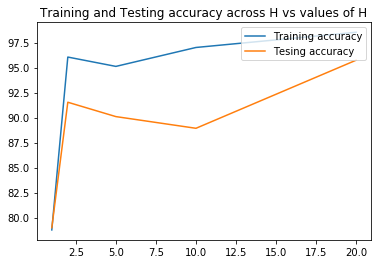

In [25]:
criteria= nn.BCELoss()
epochs=100
x_axis=[1,2,5,10,20]
training_accuracy_every_H=[]
testing_accuracy_every_H=[]
for H in [1,2,5,10,20]:
    model = Net_H(x_train.shape[1],H)
    optimizer = torch.optim.Adam(model.parameters(),lr=0.1)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
    for e in range(epochs):
        scheduler.step()
        e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    training_accuracy_every_H.append(testingAccuracy(model,x_train,train_numpy[:,-1].astype('float64')))
    testing_accuracy_every_H.append(testingAccuracy(model,x_test,output1))
plt.title('Training and Testing accuracy across H vs values of H')
plt.plot(x_axis,training_accuracy_every_H)
plt.plot(x_axis,testing_accuracy_every_H)
plt.legend(['Training accuracy','Tesing accuracy'], loc='upper right')
plt.show()

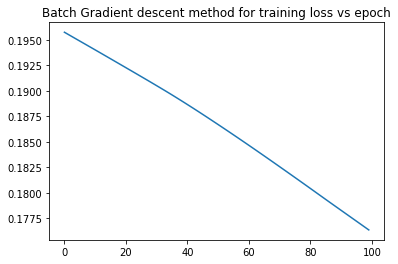

In [26]:
criteria= nn.MSELoss()
model = Net_5(x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
num_epochs = 100
loss_to_plot_batch=[]
for e in range(num_epochs):
    e_losses = train_epoch(model,optimizer ,criteria,x_train.shape[0])
    loss_to_plot_batch.append(e_losses)
plt.title('Batch Gradient descent method for training loss vs epoch')
plt.plot(loss_to_plot_batch)

In [27]:
for param in model.parameters ():
    print(param.data)

tensor([[-0.2872,  0.2823, -0.0455,  0.0249,  0.3884],
        [-0.2380, -0.0326, -0.5263,  0.0713,  0.3355],
        [ 0.3235, -0.0969, -0.1423,  0.0643,  0.2409],
        [-0.4102, -0.4412, -0.1778,  0.3506,  0.2183],
        [-0.5774,  0.1523,  0.1421, -0.1633,  0.1736]])
tensor([-0.0740,  0.2024, -0.4441, -0.1480,  0.3631])
tensor([[-0.4076, -0.1568, -0.1575, -0.1474, -0.4302]])
tensor([-0.5100])


In [28]:
baseline_accuracy = testingAccuracy(model,x_test,output1)
baseline_error= 1-(baseline_accuracy/100)
baseline_error_plot=[baseline_error]*100

Accuracy is  78.98892534864643


Accuracy for the testing data with learning rate  0.01
Accuracy is  99.27194421657096
Accuracy for the training data
Accuracy is  98.83335380081051
Accuracy for the testing data with learning rate  0.02
Accuracy is  99.13863822805578
Accuracy for the training data
Accuracy is  98.808792828196
Accuracy for the testing data with learning rate  0.001
Accuracy is  99.04634946677605
Accuracy for the training data
Accuracy is  98.83335380081051
Accuracy for the testing data with learning rate  0.002
Accuracy is  99.23092698933552
Accuracy for the training data
Accuracy is  98.83335380081051


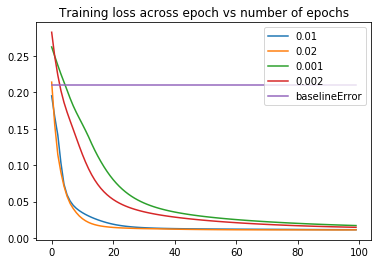

In [29]:
criteria= nn.MSELoss()
for learning_rate in [0.01,0.02,0.001,0.002]:
    num_epochs = 100
    e_losses=[]
    loss_across_epoch=[]
    model1 = Net_5(x_train.shape[1])
    optimizer = torch.optim.Adam(model1.parameters(),lr=learning_rate)
    for e in range(num_epochs):
        e_losses = train_epoch(model1,optimizer ,criteria,100)
        loss_across_epoch.append(e_losses)
    
    print("Accuracy for the testing data with learning rate ",learning_rate)
    dummy=testingAccuracy(model1,x_test,output1)
    print("Accuracy for the training data")
    dummy=testingAccuracy(model1,x_train,train_numpy[:,-1].astype('float64'))
    plt.title('Training loss across epoch vs number of epochs')
    plt.plot(loss_across_epoch)
    
plt.plot(baseline_error_plot)
plt.legend(['0.01','0.02','0.001','0.002','baselineError'], loc='upper right')
plt.show()

Accuracy is  78.76703917475132
Accuracy is  78.98892534864643
Accuracy is  78.76703917475132
Accuracy is  78.98892534864643
Accuracy is  97.44565884809039
Accuracy is  94.13453650533225
Accuracy is  98.28073191698391
Accuracy is  93.79614438063987
Accuracy is  98.53862212943632
Accuracy is  96.1033634126333


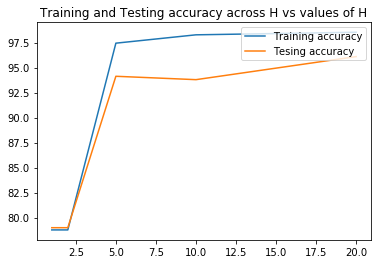

In [30]:
epochs=100
x_axis=[1,2,5,10,20]
training_accuracy_every_H=[]
testing_accuracy_every_H=[]
criteria= nn.MSELoss()
for H in [1,2,5,10,20]:
    model = Net_H(x_train.shape[1],H)
    optimizer = torch.optim.Adam(model.parameters(),lr=0.1)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
    for e in range(epochs):
        scheduler.step()
        e_losses = train_epoch(model,optimizer,criteria,x_train.shape[0])
    training_accuracy_every_H.append(testingAccuracy(model,x_train,train_numpy[:,-1].astype('float64')))
    testing_accuracy_every_H.append(testingAccuracy(model,x_test,output1))
plt.title('Training and Testing accuracy across H vs values of H')
plt.plot(x_axis,training_accuracy_every_H)
plt.plot(x_axis,testing_accuracy_every_H)
plt.legend(['Training accuracy','Tesing accuracy'], loc='upper right')
plt.show()